In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [3]:
url='https://raw.githubusercontent.com/begumis/Melbourne-Housing-Market/main/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)
df_copy = df.copy()
data_no_outliers = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')
num_columns = df.shape[1]
print("Number of columns in the dataset:", num_columns)

Shape     : (34857, 21)
Size      : 731997
Dimension : 2
Number of columns in the dataset: 21


In [6]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
df_copy.duplicated().sum()

1

In [8]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [9]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


In [10]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [11]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

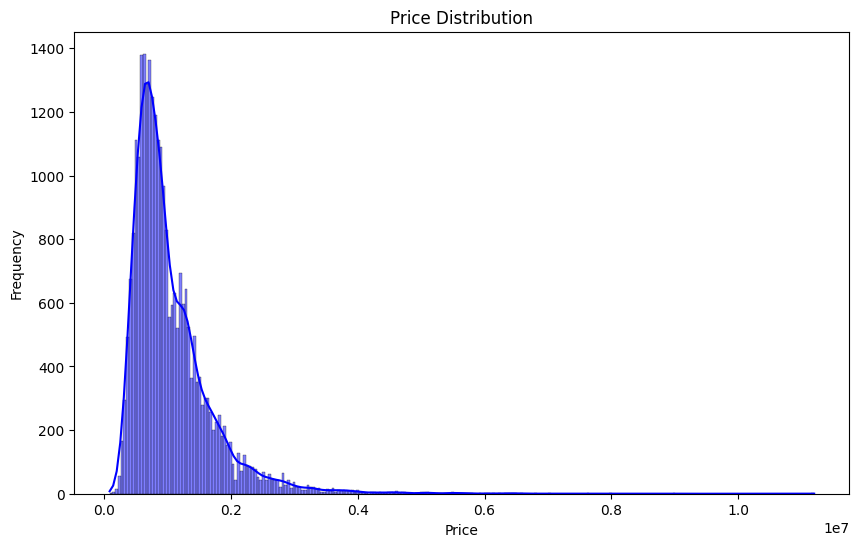

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

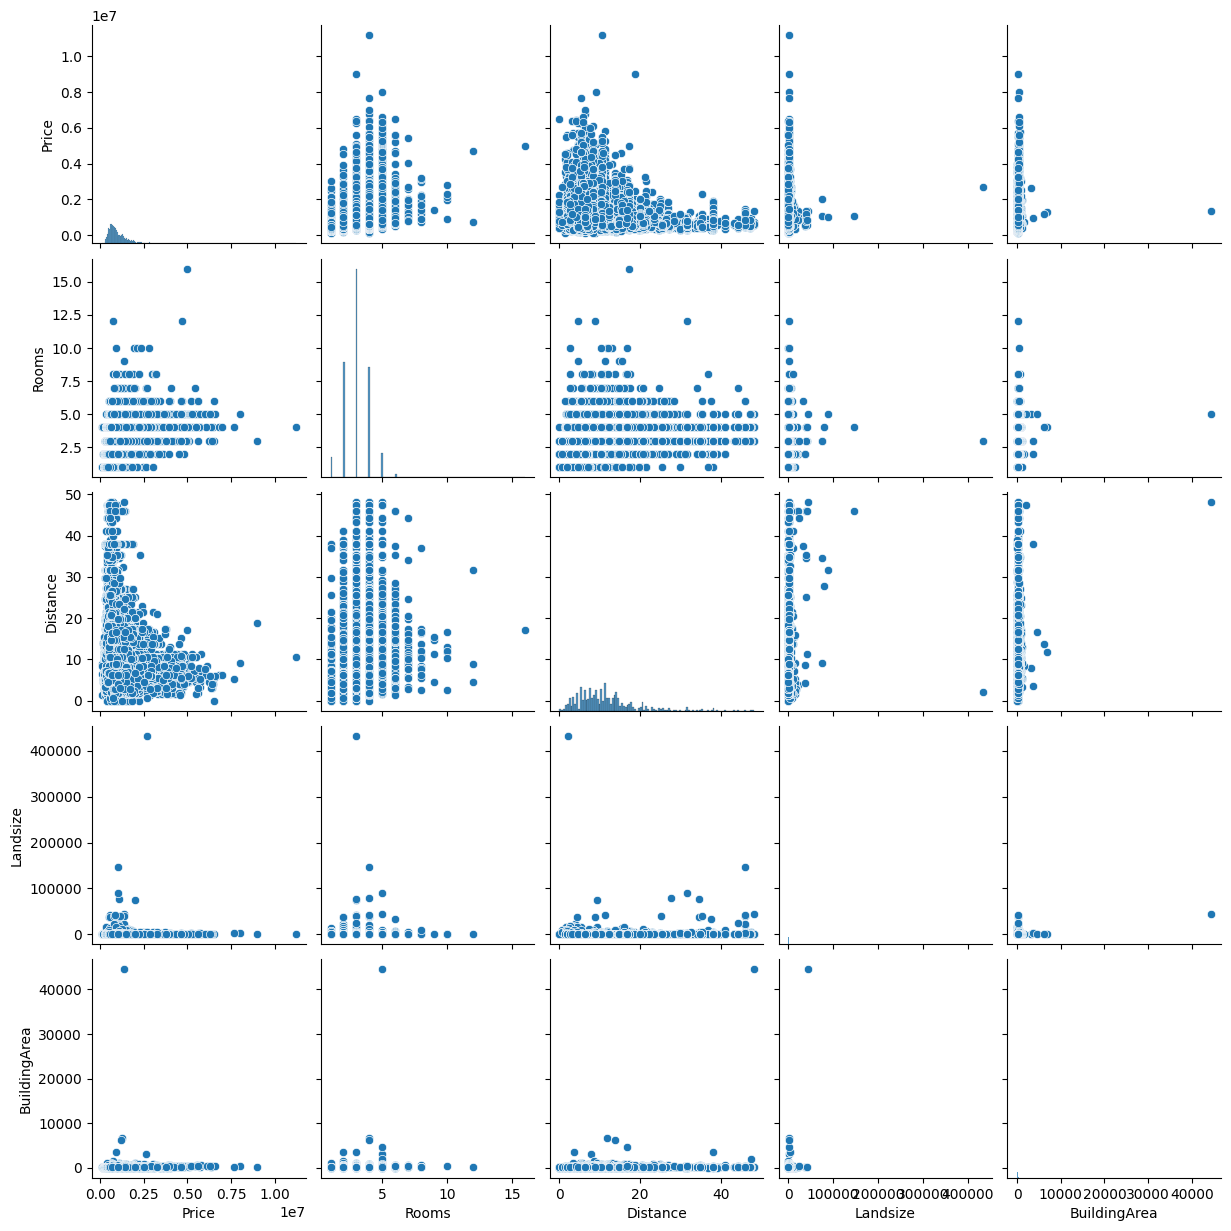

In [13]:
sns.pairplot(df[['Price', 'Rooms', 'Distance', 'Landsize', 'BuildingArea']])
plt.show()

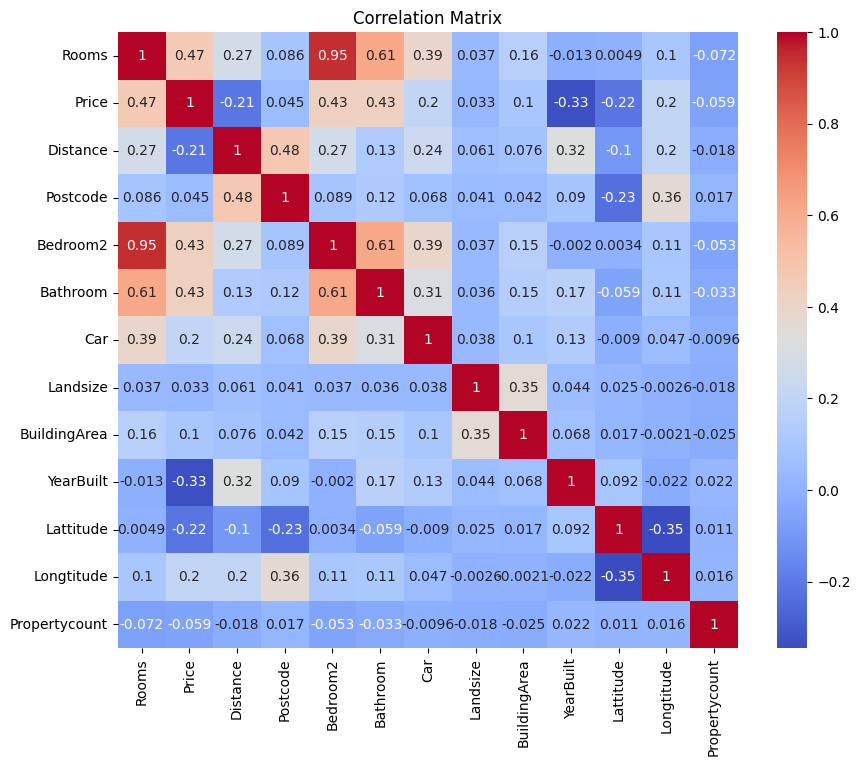

In [14]:
numerical_df = df.select_dtypes(include=['number'])


corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:

categorical_columns = ['Suburb','Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
for column in categorical_columns:
    df[column] = df[column].astype('category')


df.drop_duplicates(inplace=True)



z_scores = np.abs(stats.zscore(df[['Landsize', 'BuildingArea']]))
data_no_outliers = df[(z_scores < 3).all(axis=1)]


categorical_columns_with_missing = ['Bathroom', 'Car']
for column in categorical_columns_with_missing:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

outlier_indices = (z_scores >= 3).any(axis=1)
data_no_outliers = df[~outlier_indices]

data_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34856 non-null  category
 1   Address        34856 non-null  category
 2   Rooms          34856 non-null  int64   
 3   Type           34856 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34856 non-null  category
 6   SellerG        34856 non-null  category
 7   Date           34856 non-null  object  
 8   Distance       34855 non-null  float64 
 9   Postcode       34855 non-null  float64 
 10  Bedroom2       26639 non-null  float64 
 11  Bathroom       34856 non-null  float64 
 12  Car            34856 non-null  float64 
 13  Landsize       23046 non-null  float64 
 14  BuildingArea   13741 non-null  float64 
 15  YearBuilt      15550 non-null  float64 
 16  CouncilArea    34853 non-null  category
 17  Lattitude      26880 non-null  float

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_no_outliers[column] = label_encoder.fit_transform(data_no_outliers[column])


data_no_outliers = pd.get_dummies(data_no_outliers, columns=categorical_columns)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

data_no_outliers['Date'] = pd.to_datetime(data_no_outliers['Date'], format='%d/%m/%Y')
data_no_outliers['Date'] = (data_no_outliers['Date'] - data_no_outliers['Date'].min()).dt.days

data_no_outliers = data_no_outliers.select_dtypes(include=[np.number])

imputer = KNNImputer()
data_no_outliers_imputed = imputer.fit_transform(data_no_outliers)
data_no_outliers_imputed = pd.DataFrame(data_no_outliers_imputed, columns=data_no_outliers.columns)


x = data_no_outliers_imputed.drop(columns=['Price','Date'])
y = data_no_outliers_imputed['Price']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}

for model_name, model_dict in models.items():
    model = model_dict['model']
    model.fit(x_train, y_train)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae_scores = {}
mse_scores = {}
rmse_scores = {}
r2_scores = {}


for model_name, model_dict in models.items():
    model = model_dict['model']
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    mae_scores[model_name] = mae
    mse_scores[model_name] = mse
    rmse_scores[model_name] = rmse
    r2_scores[model_name] = r2
     
    print(f'########## {model_name} ##########')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')

best_model_mae = min(mae_scores, key=mae_scores.get)
best_mae = mae_scores[best_model_mae]


best_model_mse = min(mse_scores, key=mse_scores.get)
best_mse = mse_scores[best_model_mse]

best_model_rmse = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_model_rmse]

best_model_r2 = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_model_r2]

print("###################")
print(f"Best MAE Model: {best_model_mae}, MAE: {best_mae}")
print(f"Best MSE Model: {best_model_mse}, MSE: {best_mse}")
print(f"Best RMSE Model: {best_model_rmse}, RMSE: {best_rmse}")
print(f"Best R2 Model: {best_model_r2}, R2: {best_r2}")


########## Lasso ##########
MAE: 304330.55027513683
MSE: 275692639170.95276
RMSE: 525064.4143064285
R2: 0.2613071099031353
########## LinearRegression ##########
MAE: 304330.8492290093
MSE: 275691124240.8913
RMSE: 525062.9716909118
R2: 0.26131116901791185
########## Ridge ##########
MAE: 304325.0139381408
MSE: 275743116275.94916
RMSE: 525112.4796421707
R2: 0.2611718611758367
########## ElasticNet ##########
MAE: 329197.4916368781
MSE: 368067007242.5124
RMSE: 606685.2620943683
R2: 0.013798547009152395
########## KNeighborsRegressor ##########
MAE: 290744.3082329317
MSE: 235890636081.75458
RMSE: 485685.7379847123
R2: 0.3679528904434448
########## RandomForestRegressor ##########
MAE: 222375.25159717875
MSE: 146835151338.56625
RMSE: 383190.7505910943
R2: 0.6065688128770176
########## GradientBoostingRegressor ##########
MAE: 242346.40347356742
MSE: 158471299230.8169
RMSE: 398084.5377941938
R2: 0.5753908324203424
########## AdaBoostRegressor ##########
MAE: 356327.1581927316
MSE: 241658095